# Loss functions

In mathematical optimization and decision theory, a loss function or cost function is a function that maps an event or values of one or more variables onto a real number intuitively representing some "cost" associated with the event. An optimization problem seeks to minimize a loss function. An objective function is either a loss function or its negative (in specific domains, variously called a reward function, a profit function, a utility function, a fitness function, etc.), in which case it is to be maximized.


## Monotonicity:
A function $f(x)$ is called montonically increasing if and only if:
$$\forall x_1,x_2 \; such \;that \; x_1 \leq x_2, \;  f(x_1) \leq f(x_2)$$

Similarly a function $f(x)$ is called montonically decresaing if and only if:
$$\forall x_1,x_2 \; such \;that \; x_1 \geq x_2, \;  f(x_1) \geq f(x_2)$$

Ideally we want our loss function to push our system to a better solution after every epoch, that is the main reason we strive to train our models with montonic functions. That way, we will __learn__ after every iteration and epoch. Of course this is only true if our model is feed the **same** information every epoch, you will see further on, specially in Neural Networks that when the we train an algorithm on  batches, even though we are supose to be followoing a monotonic function, our loss will not be monotonic

### Example Mean squared error: 
In this section we are gon to evaluate the cost function: "Mean squared value to see how it behaves"
 
$$ J(\theta_0,\theta_1) = \frac{1}{2N}\sum_{i=1}^{N}(\hat{y_i}-y_i)^2$$

In [1]:
import numpy as np
from skimage import io
from matplotlib import pyplot as plt

In [2]:
#### Firsts lets generate some simple data ###
theta1 = 2             # Define Theta1
thata0 = 0             # DEfine Theta0
x=np.linspace(0,10,11) # Define a vector 
y=theta1*x + thata0 # Define  function

$ y_i = 2x_i  + 0 $  Therefore our model should predict  ${\theta}_1 = 2 \;, \;{\theta}_0=0$  $ \;\;\;\;$
$h_{\theta_0,\theta_1}(x_i) = \hat{y_i} = {\theta}_1x_i +{\theta}_0  = 2x_i $ 

In [15]:
def plot_predictions(thetas1,thetas0,y,colors,lab = 1):
    ### Create subplots ###
    fig,axes = plt.subplots(nrows=1,ncols=2, figsize=(16,6))
    ax = axes.flatten()
    
    for theta1,theta0,color in zip(thetas1,thetas0,colors):
        h=theta1*x + theta0
        if lab == 1:
            ax[0].plot(x,h, label=f" $\Theta_1$ ={theta1}")
        else:
            ax[0].plot(x,h, label=f" $\Theta_0$ ={theta0}")
            
    ax[0].legend()

    ax[0].plot(x,y,'*r')
    ax[0].grid()
    ax[0].set_title("Preditions")
    ax[0].set_xlabel("x")
    ax[0].set_ylabel("h(x)")
  
    ### Mean squared Error Loss ###
    cost=np.zeros_like(thetas1)
    i=0
    N=len(y)
    
    for i,theta1 in enumerate(thetas1):
        h=theta1*x
        e=(y-h)**2
        cost[i]= (1/2*N)*e.sum()

    ax[1].set_title("Loss function")
    ax[1].plot(thetas1,cost ,"--")
    ax[1].grid()
    ax[1].set_xlabel('$\Theta_1$')
    ax[1].set_ylabel('$J(\Theta_0,\Theta_1)$')
    ax[1].axvline(x=2, ymin=-1, ymax=2500, color="g", linestyle="--")
    plt.show()

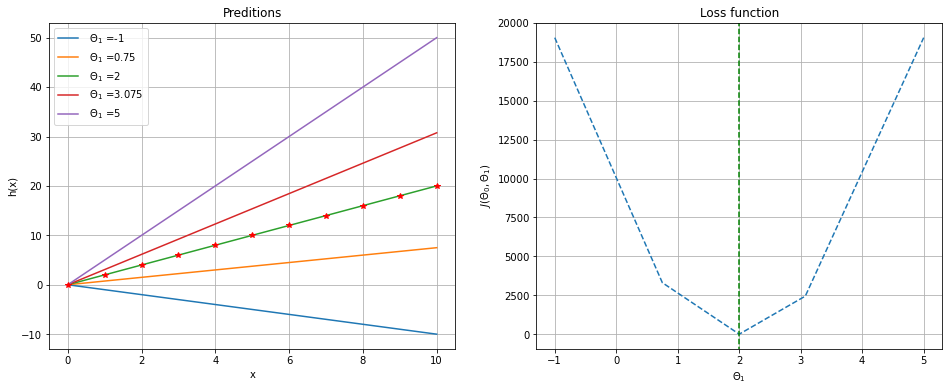

In [16]:
thetas1 = [-1,0.75,2,3.075,5]                  # Define a vectors of thetas1
thetas0 = [0,0,0,0,0]                          # Define a vecotrs of theta1
colors=['b','g','r','c','m','y','b','b','b']   # Define colors
plot_predictions(thetas1,thetas0,y,colors)     # Plot prediction and loss funcion 

We can  see that the optimal $\theta_1=2$ which we knew so this is correct

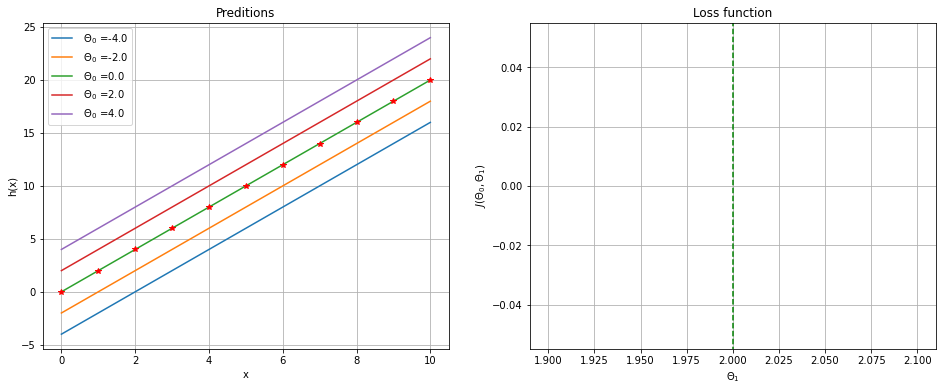

In [17]:
thetas_0 =  np.linspace(-4,4,5)
thetas_1 = 2*np.ones_like(thetas_0)
colors=['b','g','r','c','m','y','b','b','b']   # Define colors
plot_predictions(thetas_1,thetas_0,y,colors,lab=0)     # Plot prediction and loss funcion 

Notice that $ \Theta_0 $ in works to create an offset of the plot, this is useful when our real function has an ofsset, in this case our offst is 0 so  $ \hat{\Theta_0} $  should be zero too

### Visualizting The costo function:
you may havenoticesd that our cost function maps from a 2 dimensional plane to a 1 dimensional plane, the ebst way to visualize these is with a 3D plot

In [89]:
### Run this so that we can interact with 3D plot ##
%matplotlib inline  
%matplotlib notebook
%pylab

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


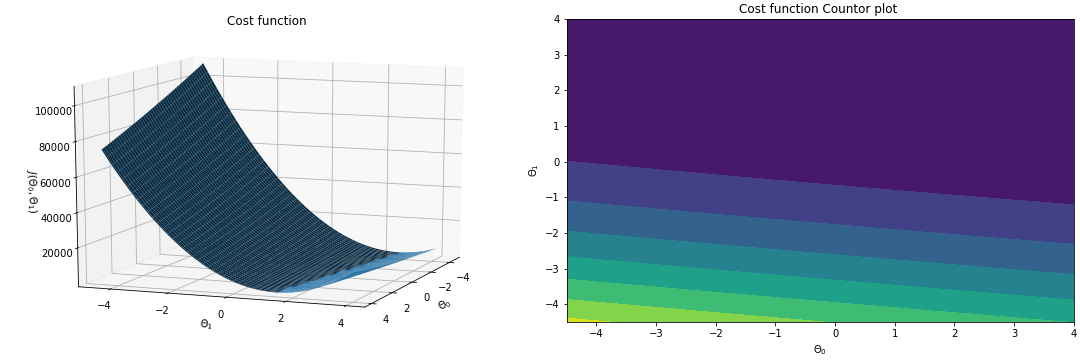

In [90]:
def plot_cost_function():
    ''' Plots cost function in 3D'''
    ### AID FUNCTION ###
    def loss(t0,t1):
        x=np.linspace(0,10,11) # Define a vector
        y = 2*x + 0           # Define targets
        N = len(y)             # Get lenght of data points

        ### Loss fucntion ###
        mean_square_loss = (1/2*N)*((t1*x +t0 - y)**2).sum()

        return  mean_square_loss

    ### Create Grids ###
    tlist = np.linspace(-4.5, 4, 100)  # Define a set of points
    T0, T1 = np.meshgrid(tlist, tlist)  # Define Grids 
    Z = np.zeros_like(T0)               # Define Z

    ### Keep and mind that a grid is nothing more than a matrix (n,m), in this case if we want to appply a loss function ####
      ###      We can just iterate over the vales of the matrix  and apply the loss function to every single point    ####

    n,m = T0.shape                         # Get shape of Grid, T0,T1 and Z must have the same shape
    for i in range(0,n):                   # Iterate over rows of Grid
        for j in range(0,m):               # Iterate over columns of Grid 
            Z[i,j] = loss(T0[i,j],T1[i,j]) # Apply the loss function

    fig =plt.figure(constrained_layout=True,figsize=(15,5)) # Create Plot

    ax1 = fig.add_subplot(121,projection='3d')  #  Subplot for plot_surface 
    ax1.plot_surface(T0, T1, Z)
    ax1.set_title("Cost function")
    ax1.set_xlabel("$\Theta_0$")
    ax1.set_ylabel("$\Theta_1$")
    ax1.set_zlabel("$J(\Theta_0,\Theta_1)$")

    ax2= fig.add_subplot(122)                  #  Subplot for countourf

    ax2.contourf(T0, T1, Z)
    ax2.set_title("Cost function Countor plot ")
    ax2.set_xlabel("$\Theta_0$")
    ax2.set_ylabel("$\Theta_1$")
    plt.show()
    
plot_cost_function()

Notice that the minimum poin is at $\theta_1 = 2$ as we expecetd.

In [87]:
%matplotlib inline  